In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from functions import *
from tqdm import tqdm
import math

In [2]:
df_train_based,df_test_based,catcol=LoadandCleanData(True,0,0.0)

In [3]:
par=dict()
for i in df_train_based.drop(['ID','y'],axis=1).columns:
    print(i)
    y=df_train_based.groupby(i).mean()['y']
    counts=df_train_based.groupby(i).count()['y']
    std=df_train_based.groupby(i).std()['y']
    if len(y)==1:
        continue
    if counts[0]==1:
        std[0]=1000
    if counts[1]==1:
        std[1]=1000   
    #print(i,0,y[0],counts[0],std[0])
    #print(i,1,y[1],counts[1],std[1])
    par[i]=[y[0],y[1],counts[0],counts[1],std[0],std[1]]

X10
X12
X13
X14
X15
X16
X17
X18
X19
X20
X21
X22
X23
X24
X26
X27
X28
X29
X30
X31
X32
X33
X34
X36
X38
X40
X41
X42
X43
X44
X45
X46
X47
X48
X49
X50
X51
X52
X53
X54
X55
X56
X57
X58
X59
X60
X61
X62
X63
X64
X65
X66
X67
X68
X69
X70
X71
X73
X74
X75
X77
X78
X79
X80
X81
X82
X83
X85
X86
X87
X88
X89
X90
X91
X92
X95
X96
X97
X98
X99
X100
X101
X103
X104
X105
X106
X108
X109
X110
X111
X112
X114
X115
X116
X117
X118
X120
X123
X124
X125
X126
X127
X128
X129
X130
X131
X132
X133
X135
X136
X137
X138
X139
X140
X141
X142
X143
X144
X145
X148
X150
X151
X152
X153
X154
X155
X156
X157
X158
X159
X160
X161
X162
X163
X164
X165
X166
X167
X168
X169
X170
X171
X173
X174
X175
X176
X177
X178
X179
X180
X181
X182
X183
X184
X185
X186
X187
X189
X190
X191
X192
X194
X195
X196
X197
X198
X200
X201
X202
X203
X204
X205
X206
X207
X208
X209
X210
X211
X212
X215
X217
X218
X219
X220
X221
X223
X224
X225
X228
X229
X230
X231
X234
X236
X237
X238
X240
X241
X246
X249
X250
X251
X252
X255
X256
X257
X258
X259
X260
X261
X263
X264
X265
X267
X269
X270


In [4]:
ly1t=list()
ly2t=list()
ly3t=list()
ly4t=list()
for i in tqdm(range(len(df_train_based))):
    column=df_train_based.iloc[i]
    n=0
    ymean=0
    ycount=0
    y_over_std=0
    y_over_std2=0
    sum_count=0
    sum_std=0
    sum_std2=0          
    for j in df_train_based.drop(['ID'],axis=1).columns:      
        if j in par.keys():
           # print(j)
            value=int(column[j])
            mean=par[j][value]
            counts=par[j][value+2]
            std=par[j][value+4] 
            n=n+1
            ymean=ymean+mean
            ycount=ycount+mean*counts
            y_over_std=y_over_std+mean/std
            y_over_std2=y_over_std2+(mean*mean)/(std*std)  
            sum_count=sum_count+counts
            sum_std=sum_std+1.0/(std)
            sum_std2= sum_std2+1.0/(std*std)
    y_1=ymean/n
    y_2=ycount/sum_count
    y_3=y_over_std/sum_std
    y_4=math.sqrt(y_over_std2/sum_std2)
    ly1t.append(y_1)
    ly2t.append(y_2)
    ly3t.append(y_3)
    ly4t.append(y_4)        

100%|██████████| 4209/4209 [00:49<00:00, 85.66it/s] 


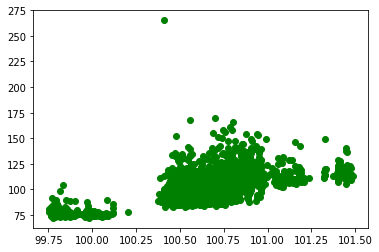

In [15]:
plt.plot(ly1t,df_train_based['y'].values,"go")
#plt.axis([100.8,101.3,65, 120])
#100.3 #101

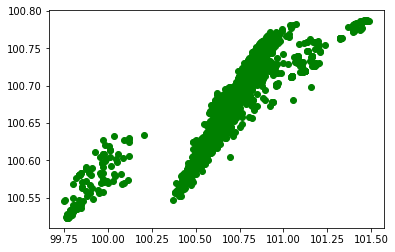

In [6]:
plt.plot(ly1t,ly2t,"go")

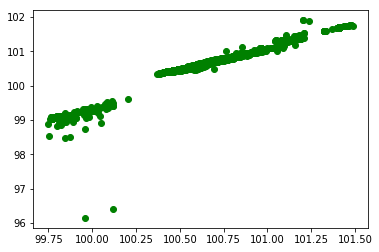

In [7]:
plt.plot(ly1t,ly3t,"go")

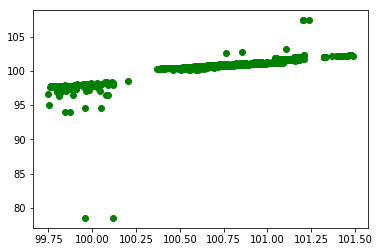

In [8]:
plt.plot(ly1t,ly4t,"go")

In [9]:
ly1=list()
ly2=list()
ly3=list()
ly4=list()
for i in tqdm(range(len(df_test_based))):
    column=df_test_based.iloc[i]
    n=0
    ymean=0
    ycount=0
    y_over_std=0
    y_over_std2=0
    sum_count=0
    sum_std=0
    sum_std2=0          
    for j in df_test_based.drop(['ID'],axis=1).columns:      
        if j in par.keys():
           # print(j)
            value=int(column[j])
            mean=par[j][value]
            counts=par[j][value+2]
            std=par[j][value+4] 
            n=n+1
            ymean=ymean+mean
            ycount=ycount+mean*counts
            y_over_std=y_over_std+mean/std
            y_over_std2=y_over_std2+(mean*mean)/(std*std)  
            sum_count=sum_count+counts
            sum_std=sum_std+1.0/(std)
            sum_std2= sum_std2+1.0/(std*std)
    y_1=ymean/n
    y_2=ycount/sum_count
    y_3=y_over_std/sum_std
    y_4=math.sqrt(y_over_std2/sum_std2)
    ly1.append(y_1)
    ly2.append(y_2)
    ly3.append(y_3)
    ly4.append(y_4)        

100%|██████████| 4209/4209 [01:11<00:00, 59.22it/s]


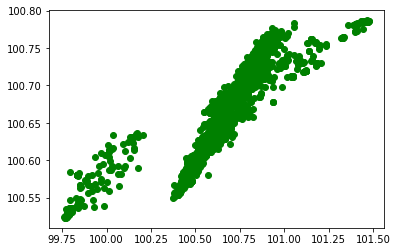

In [10]:
plt.plot(ly1,ly2,"go")

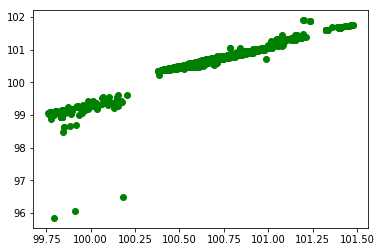

In [11]:
plt.plot(ly1,ly3,"go")

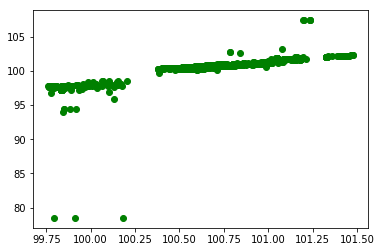

In [12]:
plt.plot(ly1,ly4,"go")

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.42551675e-04,
          0.00000000e+00,   0.00000000e+00,   2.37586125e-04,
          7.60275600e-03,   1.91779520e-01,   2.37586125e-04,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]),
 array([ 50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 110,
        115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175,
        180, 185, 190, 195, 200, 205, 210, 215

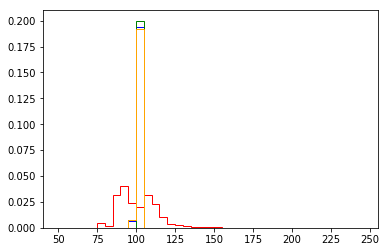

In [13]:
plt.hist(df_train_based['y'].values,bins=np.mgrid[75:175:5],color="red",histtype="step",normed=True)
plt.hist(ly1,bins=np.mgrid[50:250:5],color="blue",histtype="step",normed=True)
plt.hist(ly2,bins=np.mgrid[50:250:5],color="green",histtype="step",normed=True)
plt.hist(ly3,bins=np.mgrid[50:250:5],color="black",histtype="step",normed=True)
plt.hist(ly4,bins=np.mgrid[50:250:5],color="orange",histtype="step",normed=True)

In [21]:
df_train_based=pd.concat([df_train_based,pd.DataFrame({"mean":ly1t})],axis=1)

In [23]:
df_test_based=pd.concat([df_test_based,pd.DataFrame({"mean":ly1})],axis=1)

In [25]:
def Cluster(x):
    if x<100.3:
        return 0
    if x<101.0:
        return 1
    return 2

In [26]:
df_test_based['label']=df_test_based['mean'].apply(lambda x: Cluster(x))

In [27]:
df_train_based['label']=df_train_based['mean'].apply(lambda x: Cluster(x))

In [38]:
for i in range(3):
    print(df_train_based[df_train_based['label']==i]['y'].min(),df_train_based[df_train_based['label']==i]['y'].max())

72.11 104.65
82.62 265.32
101.86 149.63


(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.00373832,  0.05420561,  0.0682243 ,  0.0364486 ,  0.02149533,
         0.00841121,  0.00186916,  0.00186916,  0.00186916,  0.00186916,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ]),
 array([ 50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 110,
        115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175,
        180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245]),
 <a list of 1 Patch objects>)

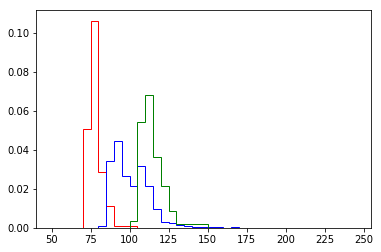

In [39]:
plt.hist(df_train_based[df_train_based['label']==0]['y'],bins=np.mgrid[50:250:5],color="red",histtype="step",normed=True)
plt.hist(df_train_based[df_train_based['label']==1]['y'],bins=np.mgrid[50:250:5],color="blue",histtype="step",normed=True)
plt.hist(df_train_based[df_train_based['label']==2]['y'],bins=np.mgrid[50:250:5],color="green",histtype="step",normed=True)

In [43]:
df_train_based[['ID','label']].to_csv("trainlabel.csv",index=False)
#df.to_csv('./{}_{}.csv'.format(name,timestamp),index=False)

In [44]:
df_test_based[['ID','label']].to_csv("testlabel.csv",index=False)